In [1]:
import motion_util as u
import scatter_plot as s
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mstats
a=u.motionUtil(['d4fc6d71b812'],windows=2.5)
a.fetch_data_from_csv('/Users/mingtak/Downloads/ASTRI/piegon/data/motion_label_20170308.csv')

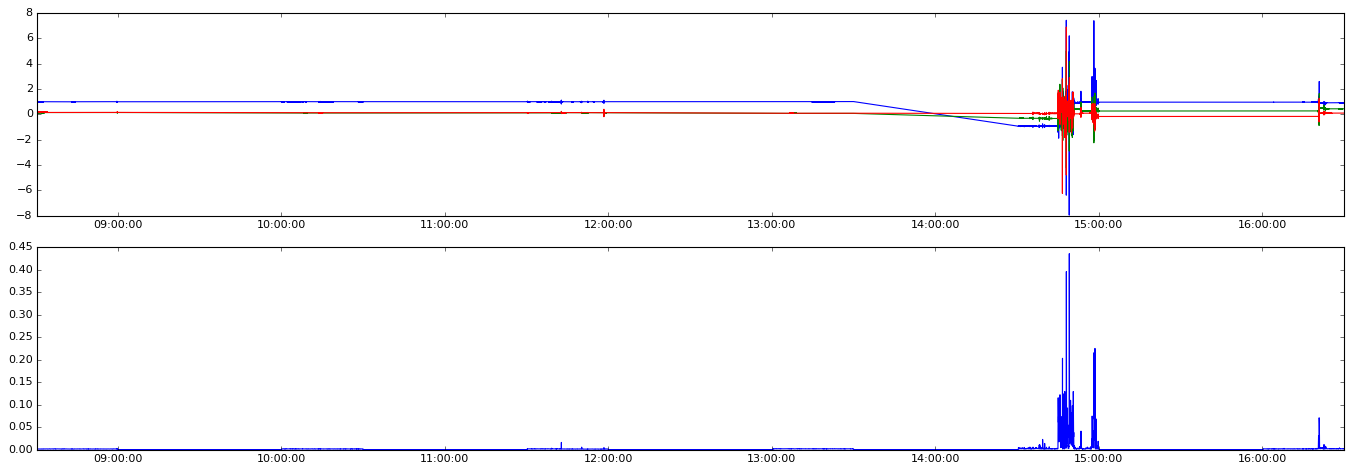

Movement before outlier removal:  25
Turkey range:  135.5 139.5
Movement after outlier removal:  24
NormaltestResult(statistic=1.0064668862836637, pvalue=0.60457264458191851)
NormaltestResult(statistic=3.4670959228539728, pvalue=0.17665652623398789)
NormaltestResult(statistic=1.1452644436407089, pvalue=0.56403880772942061)
NormaltestResult(statistic=1.5819596555977862, pvalue=0.45340032332410551)
NormaltestResult(statistic=0.47398762579522402, pvalue=0.78899616960259333)
NormaltestResult(statistic=1.407273126063874, pvalue=0.49478271962544451)
NormaltestResult(statistic=0.18347155016096103, pvalue=0.91234618229684972)
NormaltestResult(statistic=0.91928593381218682, pvalue=0.63150907490049613)
NormaltestResult(statistic=0.93975909795012047, pvalue=0.62507755498059403)
NormaltestResult(statistic=1.8258440136490053, pvalue=0.40134976223232288)
NormaltestResult(statistic=6.6751738315507332, pvalue=0.035522573342552981)
NormaltestResult(statistic=1.1452644109111154, pvalue=0.564038816959801

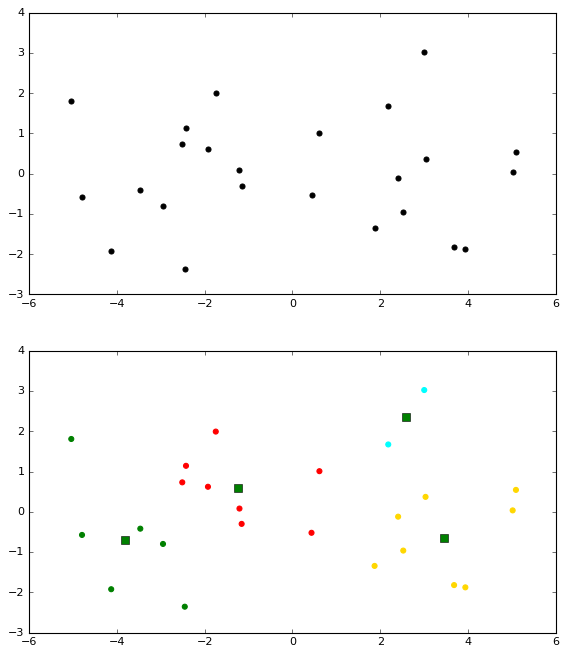

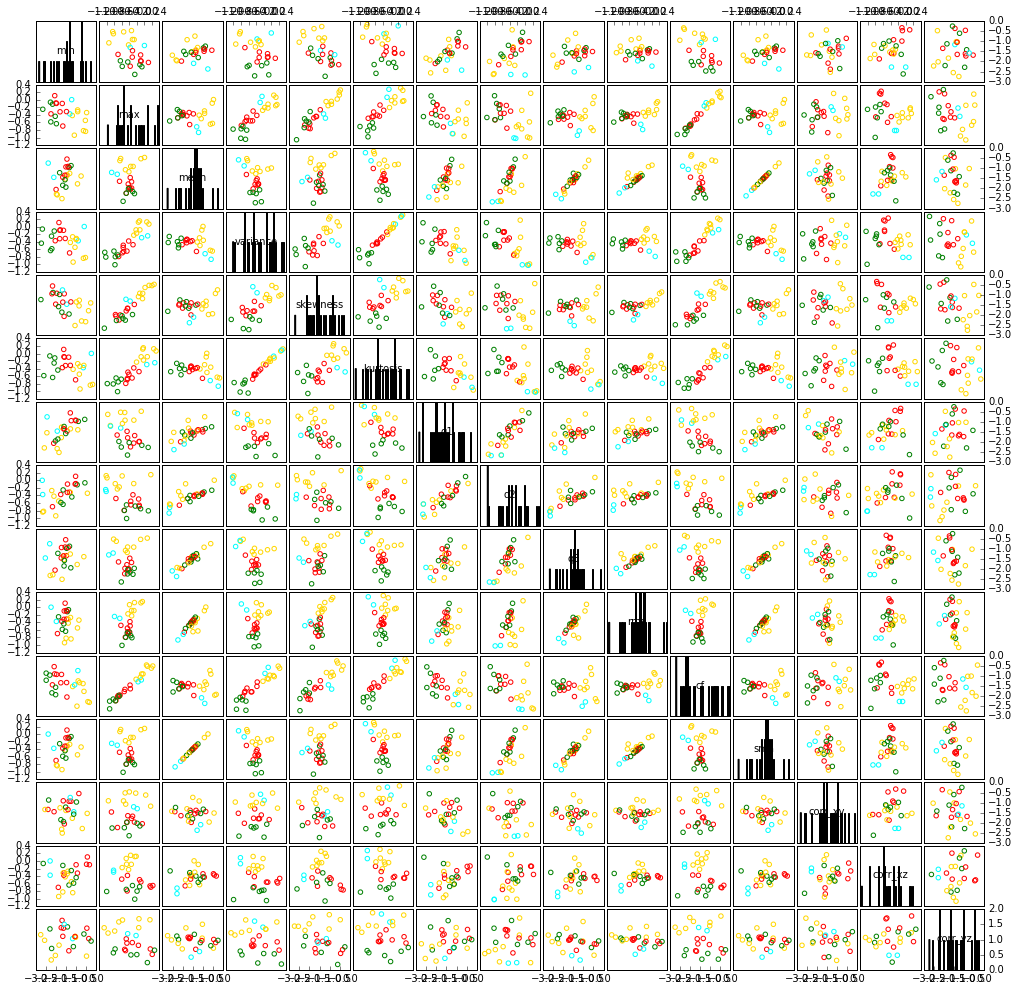

Category red characteristics


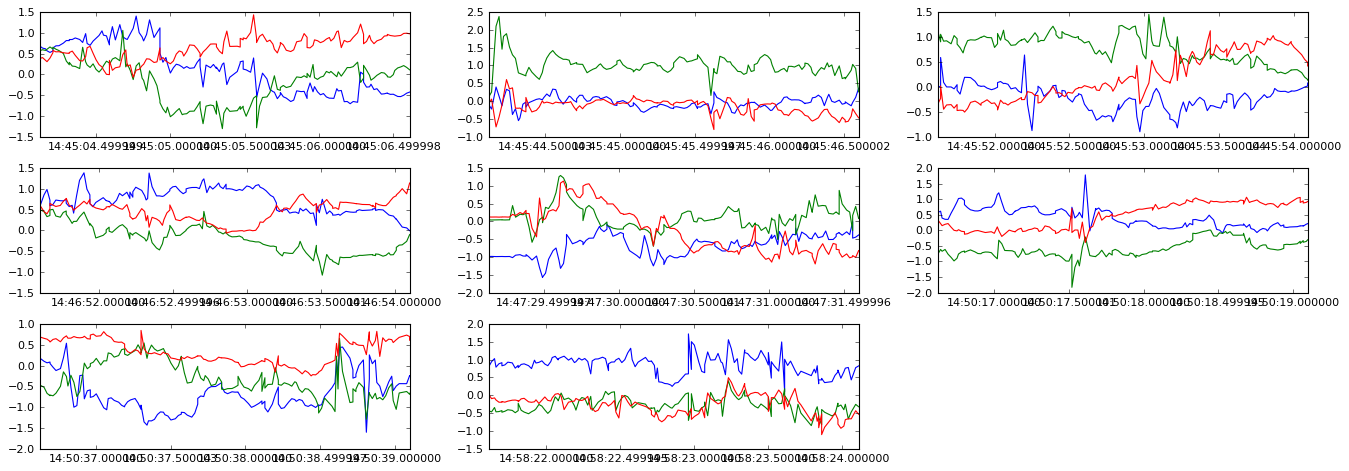

Category gold characteristics


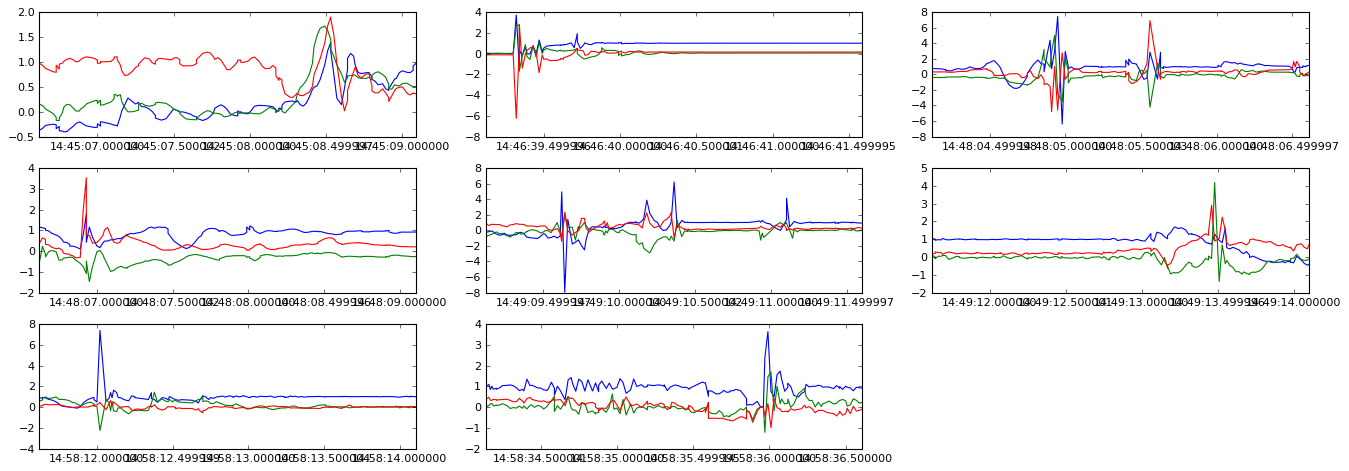

Category green characteristics


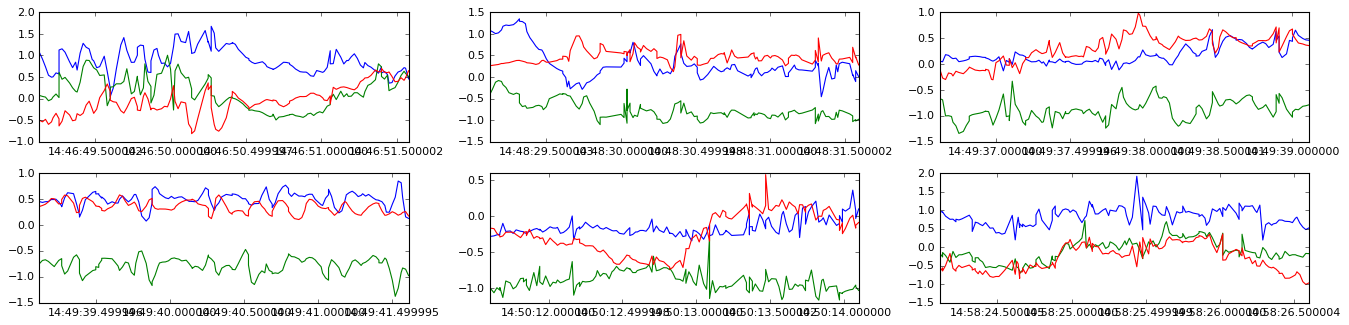

Category cyan characteristics


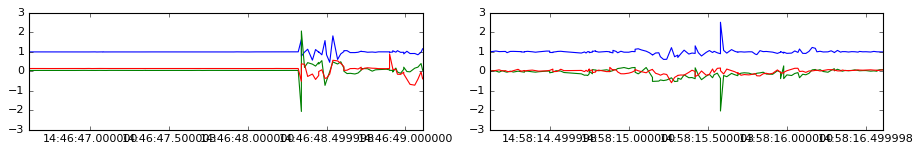

In [2]:
cluster=4
a.avcPlot()
normalized_vector=a.normalize_vector(a.get_movement_feature(a.get_movement_segment(0.08)))
print '\n'.join([str(mstats.normaltest(np.array(map(lambda x:(x['features'][i]),normalized_vector)))) for i in range(len(a.feature_list))])
idx=a.PCA_kmeans(normalized_vector,cluster)
fig = s.scatterplot_matrix(np.transpose(map(lambda x:x['features'],normalized_vector)),a.feature_list,color=map(lambda x:a.color[x], idx), facecolors='none')
plt.show()
for i in range(cluster):
    cat_feature=filter(lambda x:x[1]==i,zip(normalized_vector,idx))
    print "Category %s characteristics" % str(a.color[i])
    fig = plt.figure( figsize=(17, 2*(len(cat_feature)/3+1)), dpi=80)
    for i in range(len(cat_feature)):
        obs = cat_feature[i][0]
        label = cat_feature[i][1]
        start=obs['info'][0]
        end=obs['info'][1]
        avc=obs['info'][2]
        m=a.filter_motion(a.sample,start,end)
        # print obs['features'],'category ' +str(label)+' '+str(len(m))
        plt.subplot(len(cat_feature)/3+1,3,i+1)
        # plt.ylim(-4, 4)
        a.motion_plot(m,plt)
    plt.tight_layout()
    plt.show()

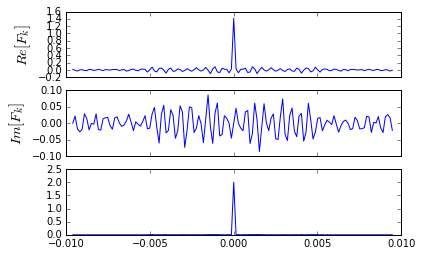

In [34]:
signal=map(lambda x:abs(x[5])+abs(x[6])+abs(x[7]),m)
Fk = np.fft.fft(signal)/len(signal) # Fourier coefficients (divided by n) nu = fft.fftfreq(n,dx) # Natural frequencies
Fk = np.fft.fftshift(Fk) # Shift zero freq to center
nu = np.fft.fftfreq(len(signal),52)
nu = np.fft.fftshift(nu) # Shift zero freq to center
f, ax = plt.subplots(3,1,sharex=True)
ax[0].plot(nu, np.real(Fk)) 
ax[0].set_ylabel(r'$Re[F_k]$', size='x-large')
ax[1].plot(nu, np.imag(Fk)) 
ax[1].set_ylabel(r'$Im[F_k]$', size='x-large')
ax[2].plot(nu, np.absolute(Fk)**2) 
# ax[2].set_ylabel(r'$\vert F_k \vert ax[2].set_xlabel(r'$\widetilde{\nu}$', size = 'x-large') 
plt.show()

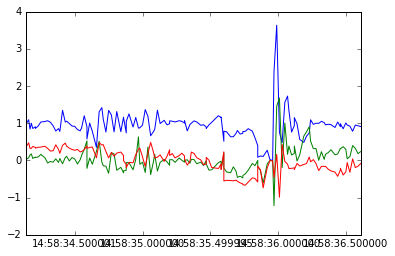

In [37]:
a.motion_plot(m,plt)
plt.show()

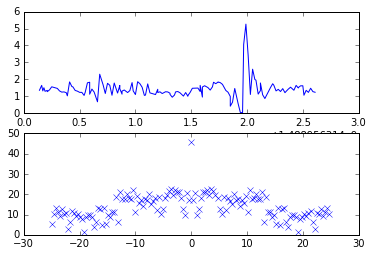

In [8]:
import scipy
import scipy.fftpack
signal = map(lambda x:abs(x[5])+abs(x[6])+abs(x[7]),m)
t = map(lambda x:x[0],m)
FFT = abs(scipy.fft(signal))
freqs = scipy.fftpack.fftfreq(len(signal), t[1]-t[0])

plt.subplot(211)
plt.plot(t, signal)
plt.subplot(212)
plt.plot(freqs,20*scipy.log10(FFT),'x')
plt.show()

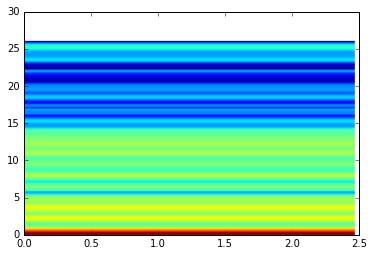

In [21]:
Pxx, freqs, bins, im = plt.specgram(signal,Fs=52)
plt.show()